# Klasifikasi Gender Berdasarkan Aktivitas Menonton Users Menggunakan K-Nearest Neighbours

## Disclaimer

Pada notebook ini saya akan berikan contoh penggunaan algoritma Machine Learning K-NN untuk menyelesaikan sebuah use case di tempat saya bekerja saat ini di bidang Entertainment.

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## **1. Membuat Data Frame dari Dictionary**

Anggap saja raw data yang kita punya adalah sebagai berikut:

| visitor_id |  name  | content_title         | category | time |
|:---        |:---    |:---                   |:---      |:---: |
|    12345   |  Luffy | Kabar Politik Terkini | News     |18:07 |
|    12345   |  Luffy | MU vs Liverpool Imbang| Sports   |20:03 |
|    .....   |  ..... | ......................| ......   |..... |


Setelah melakukan beberapa proses cleaning, pre-processing, dan menggabungkan dengan data pendukung yang lain kita bisa membuat prediksi menggunakan data yang sudah berbentuk seperti tabel di bawah ini:

| name | category | total_play| gender|
|------|----------|-----------|-------|
|Luffy | News     | 6         | Male  |
|Luffy | Sports   | 2         | Male  |
|Luffy | Sinetron | 1         | Male  |
|Luffy | ...      | ...       | ....  |


Pada data ini **Category** berperan sebagai *Feature"*, **Total Play** sebagai *Feature Value*, dan **Gender** merupakan sebuah label karena kita akan memprediksi label ini. Berikutnya kita perlu melakukan pivot table agar satu users hanya direpresentasikan dalam satu rows saja.

In [2]:
user_behaviour = {
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female'],
    'News': [0.6, 0.8, 0.5, 0.1, 0.1, 0.2, 0.1, 0.0, 0.1, 0.1],
    'Sinetron': [0.1, 0.0, 0.0, 0.0, 0.0, 0.5, 0.8, 0.0, 0.2, 0.4],
    'Entertainment': [0.1, 0.0, 0.2, 0.1, 0.0, 0.3, 0.1, 0.9, 0.5, 0.4],
    'Sports': [0.2, 0.2, 0.3, 0.8, 0.9, 0.0, 0.0, 0.1, 0.2, 0.1],
    'Target': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
}

In [3]:
df = pd.DataFrame(user_behaviour)
print(df)

   Gender  News  Sinetron  Entertainment  Sports  Target
0    Male   0.6       0.1            0.1     0.2       1
1    Male   0.8       0.0            0.0     0.2       1
2    Male   0.5       0.0            0.2     0.3       1
3    Male   0.1       0.0            0.1     0.8       1
4    Male   0.1       0.0            0.0     0.9       1
5  Female   0.2       0.5            0.3     0.0       0
6  Female   0.1       0.8            0.1     0.0       0
7  Female   0.0       0.0            0.9     0.1       0
8  Female   0.1       0.2            0.5     0.2       0
9  Female   0.1       0.4            0.4     0.1       0


## **2. Visualisasi Data**

Visualisasi data berikut diperlukan untuk melihat attribute mana yang memiliki perbedaan yang cukup signifikan.

In [4]:
%matplotlib inline

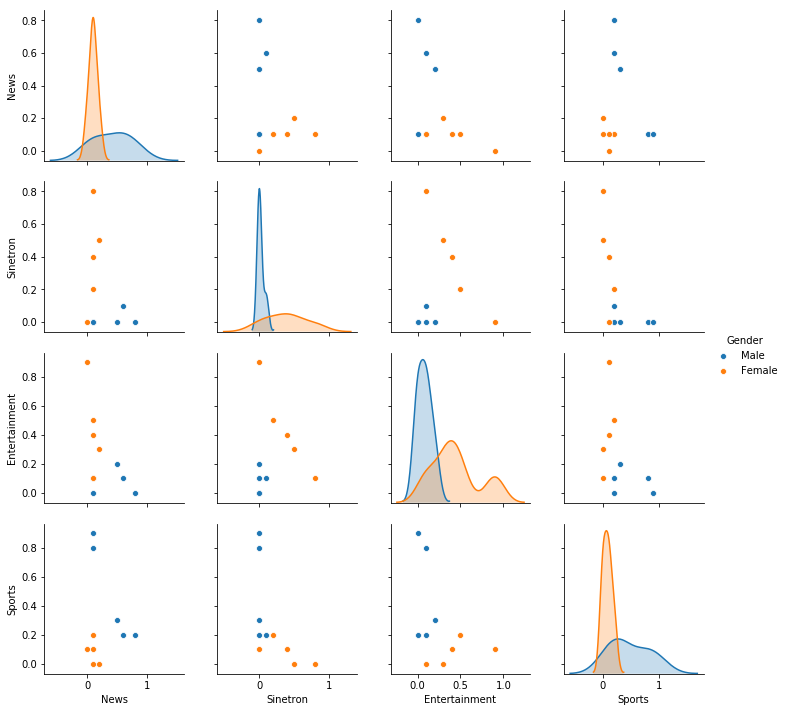

In [5]:
df_dist = df.drop('Target', axis=1)
sns.pairplot(df_dist,hue='Gender')

## **3. Using K-NN Algorithm**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
target = np.array(df['Target'])
features = np.array(df[['News', 'Sinetron', 'Entertainment', 'Sports']])
print(features)
print()
print(target)

[[0.6 0.1 0.1 0.2]
 [0.8 0.  0.  0.2]
 [0.5 0.  0.2 0.3]
 [0.1 0.  0.1 0.8]
 [0.1 0.  0.  0.9]
 [0.2 0.5 0.3 0. ]
 [0.1 0.8 0.1 0. ]
 [0.  0.  0.9 0.1]
 [0.1 0.2 0.5 0.2]
 [0.1 0.4 0.4 0.1]]

[1 1 1 1 1 0 0 0 0 0]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
pred = knn.predict(x_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

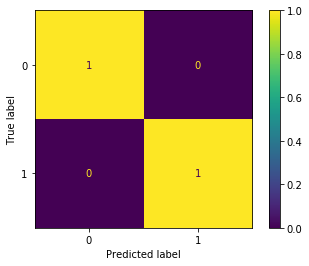

In [40]:
# print(confusion_matrix(y_test,pred))
plot_confusion_matrix(knn, x_test, y_test)

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

